Facebook tiene distintas formas de extraer información.

- **Facebook Insights**, estadisticas de nuestras páginas (no podemos extraer una lista de quien a interectuado)

- **Facebook Ads**, metricas de las campañas (actuamente se reporta con Klipfolio)

- **Facebook Public Data**, informacion de usuarios (urls paginas, nombres, numero de acciones pero no lista)

En el siguiente link vienen los campos que podemos extraer de cada una de ellas:
https://supermetrics.com/docs/product-api-getting-started/

### ¿Que hemos encontrado?

El siguiente código muestra como extraer información de FacebookAds

In [6]:
from facebook_business.api import FacebookAdsApi
from facebook_business.adobjects.adaccount import AdAccount

#Claves de acceso
my_app_id = '276686046355294'
my_app_secret = '888a472886359feee3c0c0e45b414c00'
my_access_token = 'EAAD7pP2B314BAHMQJ2aQc9QKD1oe3MSpQpoiT24bcZAUNWBzISVsWZCfZC34h1Uk5gP8nAVIEg2ZCxBz4jeE9SdcWb8Lglbxg4vP45kqLgDq9hHYHy28ujEf5GVN23AkySZCVB9nftaKZBmLuXjZBIN08jiIdJvEn7xc4QdOgCaJcWcg5QH5cY18ZC9NZCYCl6m6dTZBFZCDkCZCnwZDZD'

#Iniciar API
FacebookAdsApi.init(my_app_id, my_app_secret, my_access_token)


In [7]:
#Llamadas
my_account = AdAccount('act_754103418273978')
campaigns = my_account.get_campaigns()

print(campaigns[0:5])

FacebookRequestError: 

  Message: Call was not successful
  Method:  GET
  Path:    https://graph.facebook.com/v4.0/act_754103418273978/campaigns
  Params:  {'summary': 'true'}

  Status:  400
  Response:
    {
      "error": {
        "message": "(#2635) You are calling a deprecated version of the Ads API. Please update to the latest version: v6.0.",
        "type": "OAuthException",
        "code": 2635,
        "fbtrace_id": "A8ocQqxBmCFRSpL-RN67dMs"
      }
    }


No indagamos más en está API ya que no nos es útil para el tipo de información que necesitamos.

### Encontramos una forma de ampliar la extracción de intereses

In [38]:
from facebookads.api import FacebookAdsApi
from facebookads.adobjects.targetingsearch import TargetingSearch
import pandas as pd

FacebookAdsApi.init(my_app_id, my_app_secret, my_access_token)

palabra = "Hidalgo"

params = {
    'q': 'Mexico',
    'type': 'adinterest',
    'limit' : 80,
}

resp = TargetingSearch.search(params=params)
Intereses = pd.DataFrame(resp)
Intereses.columns
Intereses = Intereses.sort_values(by = 'audience_size', ascending =  False)

In [39]:
Intereses = Intereses.reset_index()
Intereses.head(40)

,index,audience_size,description,disambiguation_category,id,name,path,topic
0,4,467135850,None,NaN,6003015569173,Samsung,"[Intereses, Intereses adicionales, Samsung]",Business and industry
1,5,373411450,None,NaN,6003002193982,Amazon.com,"[Intereses, Intereses adicionales, Amazon.com]",Business and industry
2,6,320275650,None,NaN,6002956937323,México,"[Intereses, Intereses adicionales, México]","Travel, places and events"
3,7,226479090,None,NaN,6003333592979,SEAT,"[Intereses, Intereses adicionales, SEAT]",Hobbies and activities
4,8,200462920,None,NaN,6003221234467,Ciudad de México,"[Intereses, Intereses adicionales, Ciudad de M...","Travel, places and events"
5,9,174719800,None,NaN,6003061254185,WWE,"[Intereses, Intereses adicionales, WWE]",Sports and outdoors
6,10,143559820,None,NaN,6003144341584,Volkswagen,"[Intereses, Intereses adicionales, Volkswagen]",Business and industry
7,11,142524190,None,NaN,6003227936099,Yahoo!,"[Intereses, Intereses adicionales, Yahoo!]",Business and industry
8,12,128880490,None,NaN,6003290381256,Estado de México,"[Intereses, Intereses adicionales, Estado de M...","Travel, places and events"
9,13,122848730,None,NaN,6003256774769,Nuevo México,"[Intereses, Intereses adicionales, Nuevo México]","Travel, places and events"


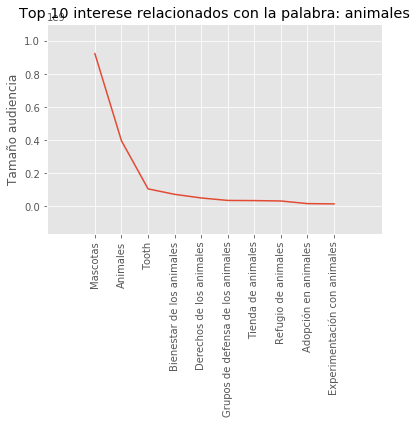

In [5]:
import matplotlib.pyplot as plt
datos = Intereses.head(10)

plt.style.use('ggplot') #Habilita los estilos de R ggplot
x = datos.name
y = datos.audience_size
labels = datos.name

plt.plot(x, y)
plt.xticks(x, labels, rotation='vertical')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.ylabel('Tamaño audiencia')
plt.title("Top 10 interese relacionados con la palabra: " + str(palabra))
plt.show()

### ¿Que podemos hacer con esta extracción de datos?

1. Optimiazación de campañas

2. Crear nuestra propia base de datos para identificar los grupos de audiencias más grandes.

3. Analizar los intereses adicionales, y ver que relaciones nos arrojan.


Podemos extraer informacion de nuestras paginas, para ver si existe una relación en el incremento de interacciones al momento de que nosostros sacamos una campaña y así comenzar a medir la efectividad.

https://business.facebook.com/officedepot.mx/insights/?referrer=page_insights_tab_button